In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read results into dataframe
mreib= '../../model/model_versions/v_7/v7_1/hds_model/0058208.txt'

### Quartiles

In [3]:
def annual_average(file_path):
    """
    Reads a tab-separated file into a pandas DataFrame with the first column as the index.

    Parameters:
    file_path (str): The path to the file to read.

    Returns:
    pd.DataFrame: The resulting DataFrame with shifted day of the year and additional columns
                  for minimum and maximum daily flow.
    """
    # Read file into DataFrame
    flow = pd.read_csv(file_path, index_col=0, sep='\t')
    
    # Drop the first row if it's unnecessary (e.g., metadata or headers)
    flow = flow.drop(flow.index[0])
    
    # Ensure the index is datetime
    flow.index = pd.to_datetime(flow.index)
    
    # Ensure the 'cout' and 'rout' columns are of float type
    flow['cout'] = flow['cout'].astype(float)
    flow['rout'] = flow['rout'].astype(float)
    
    # Replace -9999 with NaN
    flow.replace(-9999, np.nan, inplace=True)

    # Calculate the daily means, minimum, and maximum for simulated and observed flows
    daily_mean_sim = flow['cout'].groupby(flow.index.dayofyear).mean()
    daily_mean_obs = flow['rout'].groupby(flow.index.dayofyear).mean()
    daily_min_sim = flow['cout'].groupby(flow.index.dayofyear).min()
    daily_max_sim = flow['cout'].groupby(flow.index.dayofyear).max()
    daily_min_obs = flow['rout'].groupby(flow.index.dayofyear).min()
    daily_max_obs = flow['rout'].groupby(flow.index.dayofyear).max()

    # Create a DataFrame to store the results
    average_annual = pd.DataFrame({
        'sim_mean': daily_mean_sim,
        'obs_mean': daily_mean_obs,
        'sim_min': daily_min_sim,
        'sim_max': daily_max_sim,
        'obs_min': daily_min_obs,
        'obs_max': daily_max_obs
    })

    # Shift day of the year to start on November 1st
    dayofyear_shifted = ((average_annual.index - 306) % 366) + 1
    average_annual.index = dayofyear_shifted

    # Sort the DataFrame by the new index to ensure proper order
    average_annual = average_annual.sort_index()

    return average_annual

In [4]:
average_annual = annual_average(mreib)

### Hydrograph

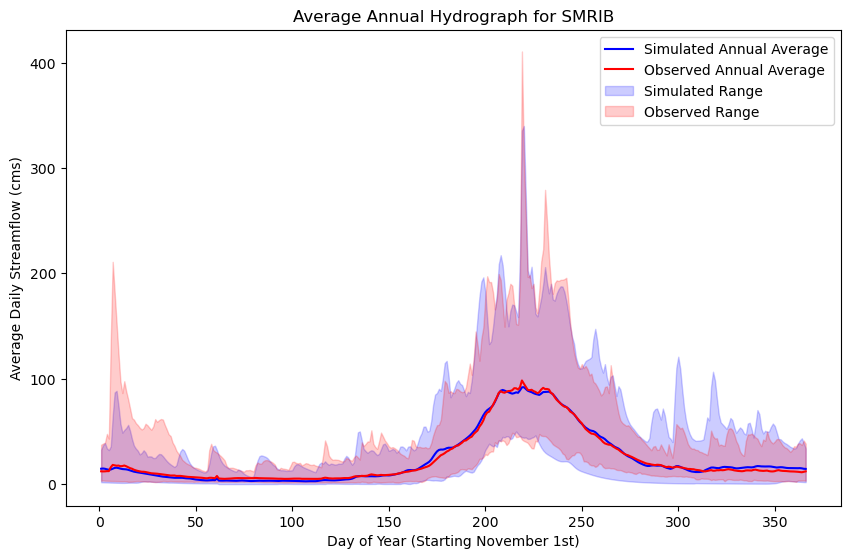

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6.18))
plt.plot(average_annual.index, average_annual['sim_mean'], label='Simulated Annual Average', color='blue')
plt.plot(average_annual.index, average_annual['obs_mean'], label='Observed Annual Average', color='red')

# Add shaded areas for the range of possible flows
plt.fill_between(average_annual.index, average_annual['sim_min'], average_annual['sim_max'], 
                 color='blue', alpha=0.2, label='Simulated Range')
plt.fill_between(average_annual.index, average_annual['obs_min'], average_annual['obs_max'], 
                 color='red', alpha=0.2, label='Observed Range')

# Adding titles and labels
plt.title('Average Annual Hydrograph for SMRIB')
plt.xlabel('Day of Year (Starting November 1st)')
plt.ylabel('Average Daily Streamflow (cms)')
plt.legend()

# Save the plot
plt.savefig('../../model/model_versions/v_7/v7_1/hds_model/average_annual_SMRIB.png')

# Display the plot
plt.show()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(average_annual.index, average_annual['sim'], label='Simulated Annual Average', color='blue')
plt.plot(average_annual.index, average_annual['obs'], label='Observed Annual Average', color='red')

# Adding titles and labels
plt.title('Average Annual Hydrograph for SMRIB')
plt.xlabel('Day of Year (Starting November 1st)')
plt.ylabel('Average Daily Streamflow (cms)')
plt.legend()

plt.savefig('../../model/model_versions/v_7/v7_1/hds_model/average_annual_SMRIB.png')

# Display the plot
plt.show()